In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "ABD.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

138

In [5]:
len(batch_per_gene)

138

In [6]:
len(fc_per_gene)

138

In [7]:
fc_per_gene

[-3.804055118,
 -3.297629186,
 -2.851794494,
 -2.57594893,
 -2.566449511,
 -2.50820201,
 -2.447244851,
 -2.35045275,
 -2.242684698,
 -2.174020989,
 -2.146261462,
 -2.129296722,
 -2.108512913,
 -2.108350695,
 -2.07432333,
 -2.046031237,
 -2.040511011,
 -2.037012058,
 -1.986802879,
 -1.968596142,
 -1.943808447,
 -1.93563118,
 -1.934386622,
 -1.879512521,
 -1.87042753,
 -1.869396397,
 -1.833392502,
 -1.819827691,
 -1.814059574,
 -1.801639823,
 -1.773543029,
 -1.762105299,
 -1.76000718,
 -1.747703118,
 -1.737794676,
 -1.702444014,
 -1.656483446,
 -1.645238177,
 -1.629942477,
 -1.628858464,
 -1.616529348,
 -1.608061679,
 -1.5828797,
 -1.561580049,
 -1.554896167,
 -1.554569473,
 -1.552076872,
 -1.547940088,
 -1.539227789,
 -1.535499749,
 -1.511678176,
 -1.502918679,
 -1.501487415,
 -1.49796097,
 -1.496969196,
 -1.487299662,
 -1.464590934,
 -1.46116539,
 -1.460415913,
 -1.460316386,
 -1.449904905,
 -1.442425083,
 -1.441650176,
 -1.435196066,
 -1.429627225,
 -1.412551683,
 -1.411239239,
 -1.41

In [8]:
fc_inhibitor_per_gene

[9.174763192,
 4.519012361,
 4.590560528,
 3.622867548,
 2.473650208,
 4.184485703,
 3.888857219,
 3.162739198,
 2.262810883,
 3.682111878,
 3.246244219,
 2.317010348,
 2.412599984,
 2.763790014,
 2.629423039,
 2.945519327,
 3.77037342,
 2.36721285,
 2.898734968,
 2.594338494,
 2.107303885,
 3.249131121,
 3.657100831,
 2.563301168,
 2.596142674,
 1.698369364,
 2.394308648,
 2.699118206,
 2.772882014,
 2.481395439,
 2.016650588,
 2.266650065,
 1.986802883,
 2.176764067,
 2.447650758,
 2.451589725,
 2.363474222,
 1.56584217,
 1.885983249,
 3.183851497,
 1.76652577,
 2.125253557,
 1.444777626,
 1.773206318,
 1.669966836,
 2.053878236,
 1.843954795,
 1.981103303,
 2.229216707,
 1.504944499,
 1.705665391,
 1.965859832,
 1.605788295,
 1.475670114,
 1.989631933,
 1.858492819,
 1.588907561,
 1.592087716,
 1.997730854,
 1.798954247,
 2.167039694,
 1.596363672,
 1.942343701,
 1.626086278,
 2.507244227,
 1.709708132,
 1.720860448,
 1.89978981,
 1.563271663,
 1.54827119,
 2.596879239,
 1.595636879

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[(-3.804055118, 9.174763192),
 (-3.297629186, 4.519012361),
 (-2.851794494, 4.590560528),
 (-2.57594893, 3.622867548),
 (-2.566449511, 2.473650208),
 (-2.50820201, 4.184485703),
 (-2.447244851, 3.888857219),
 (-2.35045275, 3.162739198),
 (-2.242684698, 2.262810883),
 (-2.174020989, 3.682111878),
 (-2.146261462, 3.246244219),
 (-2.129296722, 2.317010348),
 (-2.108512913, 2.412599984),
 (-2.108350695, 2.763790014),
 (-2.07432333, 2.629423039),
 (-2.046031237, 2.945519327),
 (-2.040511011, 3.77037342),
 (-2.037012058, 2.36721285),
 (-1.986802879, 2.898734968),
 (-1.968596142, 2.594338494),
 (-1.943808447, 2.107303885),
 (-1.93563118, 3.249131121),
 (-1.934386622, 3.657100831),
 (-1.879512521, 2.563301168),
 (-1.87042753, 2.596142674),
 (-1.869396397, 1.698369364),
 (-1.833392502, 2.394308648),
 (-1.819827691, 2.699118206),
 (-1.814059574, 2.772882014),
 (-1.801639823, 2.481395439),
 (-1.773543029, 2.016650588),
 (-1.762105299, 2.266650065),
 (-1.76000718, 1.986802883),
 (-1.747703118, 2.1

In [10]:
interesting_indices = [i for i, (left, right) in enumerate(list(zip(fc_per_gene, fc_inhibitor_per_gene))) if left > 1 and right < -1]

In [11]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [12]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [13]:
#interesting_genes

In [14]:
#interesting_genes = list(interesting_genes['gene'])

In [15]:
interesting_genes = np.array(genes)[interesting_indices]

In [16]:
batch_2

AnnData object with n_obs × n_vars = 7058 × 1346 
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [17]:
len(interesting_genes)

49

In [18]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [19]:
len(common_genes)

9

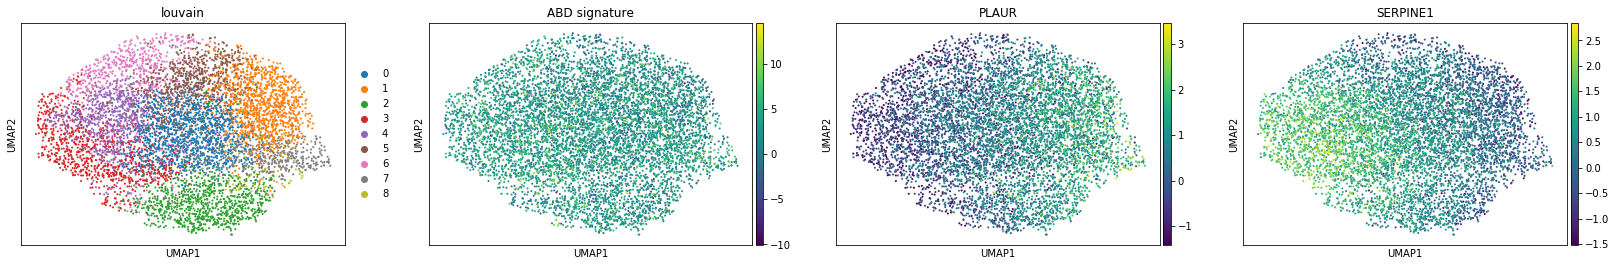

In [20]:
batch_2.obs["ABD signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'ABD signature', "PLAUR", "SERPINE1"])